<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/NLP%20SVM%20Movie%20Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 5.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load dataset
from datasets import load_dataset

dataset_train = load_dataset('imdb',split='train')


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


In [3]:
pd.DataFrame(dataset_train, columns=['text', 'label'])

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


In [19]:
df = dataset_train

# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [20]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2515
           1       0.88      0.90      0.89      2485

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

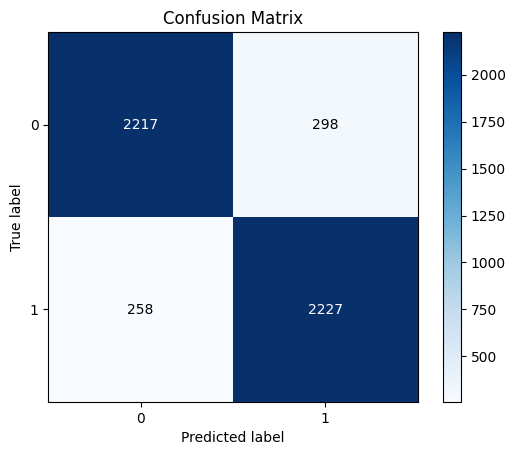

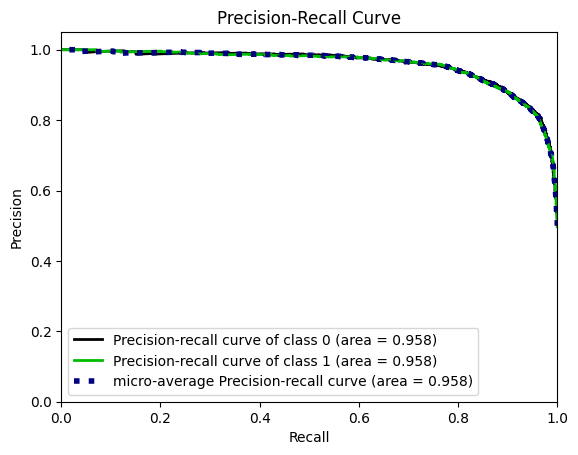

In [21]:
import scikitplot as skplt
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print report
print(report)

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Plot precision-recall curve
skplt.metrics.plot_precision_recall(y_test, clf.predict_proba(X_test))


In [22]:
import random

# uji kalimat
texts = [
    "I really loved this movie, the acting was great and the story was engaging.",
    "The cinematography was stunning, but the acting was mediocre.",
    "I thought the movie was just okay, not great but not terrible either.",
    "This movie is not good, the plot is terrible and the acting is bad.",
    "This movie is great. The story is well-written and the actors gave outstanding performances.",
    "This movie was an absolute disaster. The plot was nonsensical and the acting was terrible.",
    "I found the film to be incredibly boring. The pacing was slow and nothing really happened.",
    "The special effects were the only redeeming feature of this movie. The story was poorly written and the acting was wooden.",
    "I was really disappointed with this film. The trailer looked great, but the actual movie fell flat.",
    "I found the characters to be completely unlikable. I didn't care what happened to any of them.",
    "This movie was a triumph. The acting was superb and the story was gripping from start to finish.",
    "I was on the edge of my seat the entire time. This film was a rollercoaster of emotions.",
    "The cinematography was stunning. This movie was a work of art.",
    "I couldn't believe how much I enjoyed this film. The writing was top-notch and the acting was brilliant.",
    "This movie was everything I wanted it to be and more. I can't recommend it highly enough.",
]

random.shuffle(texts)

# Preprocess text
X_new = vectorizer.transform(texts)

# Predict sentiment
predictions = clf.predict(X_new)
for text, prediction in zip(texts, predictions):
    print(f"Text: {text}\nSentiment: {'positive' if prediction else 'negative'}\n")


Text: I was really disappointed with this film. The trailer looked great, but the actual movie fell flat.
Sentiment: negative

Text: I was on the edge of my seat the entire time. This film was a rollercoaster of emotions.
Sentiment: positive

Text: I found the film to be incredibly boring. The pacing was slow and nothing really happened.
Sentiment: negative

Text: The cinematography was stunning. This movie was a work of art.
Sentiment: positive

Text: This movie was everything I wanted it to be and more. I can't recommend it highly enough.
Sentiment: positive

Text: This movie is great. The story is well-written and the actors gave outstanding performances.
Sentiment: positive

Text: I couldn't believe how much I enjoyed this film. The writing was top-notch and the acting was brilliant.
Sentiment: positive

Text: This movie was an absolute disaster. The plot was nonsensical and the acting was terrible.
Sentiment: negative

Text: This movie is not good, the plot is terrible and the act